In [53]:
import requests as rq 
import pandas as pd

import csv 
from datetime import datetime, timedelta

In [54]:
import csv 

In [55]:
import requests as rq
from datetime import datetime, timedelta

weather = []
start_date = datetime(2023, 10, 16)  # Bắt đầu từ ngày hiện tại
end_date = datetime(2024, 10, 16)  # Dự báo cho 14 ngày tới (tối đa với API miễn phí)
current_date = start_date

while current_date < end_date: 
    # Format the date for the API call
    date_str = current_date.strftime('%Y-%m-%d')
    response = rq.get(f'http://api.weatherapi.com/v1/history.json?key=f2b3808c25b3445681415303242010&q=Ho Chi Minh&dt={date_str}')
    
    if response.status_code == 200:
        rsp = response.json()
        day_data = rsp['forecast']['forecastday'][0]['day']
        location = rsp['location']
        weather.append([
            date_str, 
            location['name'],
            location['country'],
            location['localtime'],
            location['lat'],
            location['lon'],
            day_data['maxtemp_c'],
            day_data['mintemp_c'],
            day_data['avgtemp_c'],
            day_data['maxwind_mph'],
            day_data["maxwind_kph"],
            day_data['totalprecip_mm'],
            day_data["avghumidity"],
            day_data['uv'],
            day_data['condition']['text']  
        ]) 
        print(f"Added data for {date_str}")
    else:
        print(f"Failed to fetch data for {date_str}")
    
    current_date += timedelta(days=1)
csv_file_path = 'weather_data.csv'

# Write the weather data to a CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'City', 'Country', 'Local Time', 'Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 
                     'Avg Temp (C)', 'Max Wind (mph)', 'Max Wind (kph)', 'Total Precip (mm)', 
                     'Avg Humidity (%)', 'UV Index', 'Condition'])
    # Write the data rows   
    writer.writerows(weather)

print(f"Weather data has been saved to {csv_file_path}")
# print(weather)

Failed to fetch data for 2023-10-16
Failed to fetch data for 2023-10-17
Failed to fetch data for 2023-10-18
Failed to fetch data for 2023-10-19
Added data for 2023-10-20
Added data for 2023-10-21
Added data for 2023-10-22
Added data for 2023-10-23
Added data for 2023-10-24
Added data for 2023-10-25
Added data for 2023-10-26
Added data for 2023-10-27
Added data for 2023-10-28
Added data for 2023-10-29
Added data for 2023-10-30
Added data for 2023-10-31
Added data for 2023-11-01
Added data for 2023-11-02
Added data for 2023-11-03
Added data for 2023-11-04
Added data for 2023-11-05
Added data for 2023-11-06
Added data for 2023-11-07
Added data for 2023-11-08
Added data for 2023-11-09
Added data for 2023-11-10
Added data for 2023-11-11
Added data for 2023-11-12
Added data for 2023-11-13
Added data for 2023-11-14
Added data for 2023-11-15
Added data for 2023-11-16
Added data for 2023-11-17
Added data for 2023-11-18
Added data for 2023-11-19
Added data for 2023-11-20
Added data for 2023-11-2

In [56]:
# Load data
df = pd.read_csv('weather_data.csv')

In [57]:
# Step 1: Convert Local Time to datetime format
df['Local Time'] = pd.to_datetime(df['Local Time'])

In [58]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype(float)

print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [59]:
# Đọc file CSV vào DataFrame
df = pd.read_csv('weather_data.csv')

# Xóa cột 'Max Wind (mph)'
df = df.drop(columns=['Max Wind (mph)'])

# Ghi lại DataFrame vào file CSV mới
df.to_csv('weather_data.csv', index=False)

In [60]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.2,24.7,27.0,9.4,34.29,86,7.0,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.8,24.5,27.3,11.5,5.05,81,7.0,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,32.9,24.3,27.3,10.1,6.15,82,7.0,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,30.7,24.0,26.5,11.9,8.29,85,7.0,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,31.0,24.5,27.0,11.2,21.59,84,7.0,Light rain shower


In [61]:
df=pd.read_csv("weather_data.csv")
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.2,24.7,27.0,9.4,34.29,86,7.0,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.8,24.5,27.3,11.5,5.05,81,7.0,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,32.9,24.3,27.3,10.1,6.15,82,7.0,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,30.7,24.0,26.5,11.9,8.29,85,7.0,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,31.0,24.5,27.0,11.2,21.59,84,7.0,Light rain shower


In [62]:
df.drop_duplicates(inplace=True)

In [63]:
missing_data = df.isnull().sum()
print(missing_data)

Date                 0
City                 0
Country              0
Local Time           0
Latitude             0
Longitude            0
Max Temp (C)         0
Min Temp (C)         0
Avg Temp (C)         0
Max Wind (kph)       0
Total Precip (mm)    0
Avg Humidity (%)     0
UV Index             0
Condition            0
dtype: int64


In [64]:
stats = df.describe()
print(stats)

       Latitude     Longitude  Max Temp (C)  Min Temp (C)  Avg Temp (C)  \
count    362.00  3.620000e+02    362.000000    362.000000    362.000000   
mean      10.75  1.066667e+02     33.711878     25.022376     28.433149   
std        0.00  1.423052e-14      3.381266      1.531578      1.945975   
min       10.75  1.066667e+02     25.500000     21.000000     24.400000   
25%       10.75  1.066667e+02     31.500000     24.000000     27.025000   
50%       10.75  1.066667e+02     33.800000     24.700000     28.200000   
75%       10.75  1.066667e+02     36.500000     25.800000     29.800000   
max       10.75  1.066667e+02     40.800000     29.800000     32.900000   

       Max Wind (kph)  Total Precip (mm)  Avg Humidity (%)    UV Index  
count      362.000000         362.000000        362.000000  362.000000  
mean        17.967127           4.383785         70.323204    7.574586  
std          6.106737           6.822089         11.824570    1.042698  
min          7.200000           

In [65]:
df.dtypes

Date                  object
City                  object
Country               object
Local Time            object
Latitude             float64
Longitude            float64
Max Temp (C)         float64
Min Temp (C)         float64
Avg Temp (C)         float64
Max Wind (kph)       float64
Total Precip (mm)    float64
Avg Humidity (%)       int64
UV Index             float64
Condition             object
dtype: object

In [66]:
rain_conditions = ['Light rain shower', 'Patchy rain possible', 'Patchy light drizzle', 'Patchy light rain with thunder', 'Light drizzle']
df['Status'] = df['Condition'].apply(lambda x: 1 if x in rain_conditions else 0)


In [84]:
# Step 6: Add Avg Temp (F) column converted from Celsius
df['Avg Temp (F)'] = (df['Avg Temp (C)'] * 9/5) + 32  # Celsius to Fahrenheit conversion
df.to_csv('weather_data.csv', index=False)


In [68]:
# Reorder columns to place 'Status' before 'Condition' and Avg Temp columns together
cols = df.columns.tolist()
status_index = cols.index('Status')
condition_index = cols.index('Condition')
avg_temp_c_index = cols.index('Avg Temp (C)')
avg_temp_f_index = cols.index('Avg Temp (F)')


In [69]:
# Move Status before Condition
cols.insert(condition_index, cols.pop(status_index))

In [70]:
# Move Avg Temp (F) next to Avg Temp (C)
if avg_temp_f_index > avg_temp_c_index:
    cols.insert(avg_temp_c_index + 1, cols.pop(avg_temp_f_index))

In [71]:
df = df[cols]

In [72]:
# Map the 'Status' column for display purposes
df_display = df.copy()
df_display['Status'] = df_display['Status'].map({1: 'Rain', 0: 'No Rain'})

In [73]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [74]:
# Display results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (C)', 'Avg Temp (F)', 'Max Wind (kph)', 'Total Precip (mm)', 'Avg Humidity (%)', 'UV Index', 'Status']
Categorical Columns: ['Date', 'City', 'Country', 'Local Time', 'Condition']


In [75]:
df_display.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Status,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.2,24.7,27.0,80.60,9.4,34.29,86,7.0,Rain,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.8,24.5,27.3,81.14,11.5,5.05,81,7.0,Rain,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,32.9,24.3,27.3,81.14,10.1,6.15,82,7.0,Rain,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,30.7,24.0,26.5,79.70,11.9,8.29,85,7.0,Rain,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,7.0,Rain,Light rain shower


In [76]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Status,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.2,24.7,27.0,80.60,9.4,34.29,86,7.0,1,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.8,24.5,27.3,81.14,11.5,5.05,81,7.0,1,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,32.9,24.3,27.3,81.14,10.1,6.15,82,7.0,1,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,30.7,24.0,26.5,79.70,11.9,8.29,85,7.0,1,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,7.0,1,Light rain shower


In [77]:
df.drop(columns=['UV Index'])

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),Status,Condition
0,2023-10-20,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.2,24.7,27.0,80.60,9.4,34.29,86,1,Patchy light rain with thunder
1,2023-10-21,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,31.8,24.5,27.3,81.14,11.5,5.05,81,1,Light rain shower
2,2023-10-22,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,32.9,24.3,27.3,81.14,10.1,6.15,82,1,Patchy light rain with thunder
3,2023-10-23,Ho Chi Minh City,Vietnam,2024-10-20 10:47,10.75,106.6667,30.7,24.0,26.5,79.70,11.9,8.29,85,1,Light rain shower
4,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-20 10:46,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,1,Light rain shower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024-10-11,Ho Chi Minh City,Vietnam,2024-10-20 10:48,10.75,106.6667,32.2,24.6,27.8,82.04,11.9,7.13,82,1,Light rain shower
358,2024-10-12,Ho Chi Minh City,Vietnam,2024-10-20 10:48,10.75,106.6667,31.9,24.9,27.7,81.86,10.4,10.78,83,1,Light rain shower
359,2024-10-13,Ho Chi Minh City,Vietnam,2024-10-20 10:49,10.75,106.6667,32.0,24.9,27.7,81.86,10.1,10.36,84,1,Patchy light rain with thunder
360,2024-10-14,Ho Chi Minh City,Vietnam,2024-10-20 10:48,10.75,106.6667,31.3,25.4,27.8,82.04,10.1,15.49,82,0,Moderate or heavy rain shower


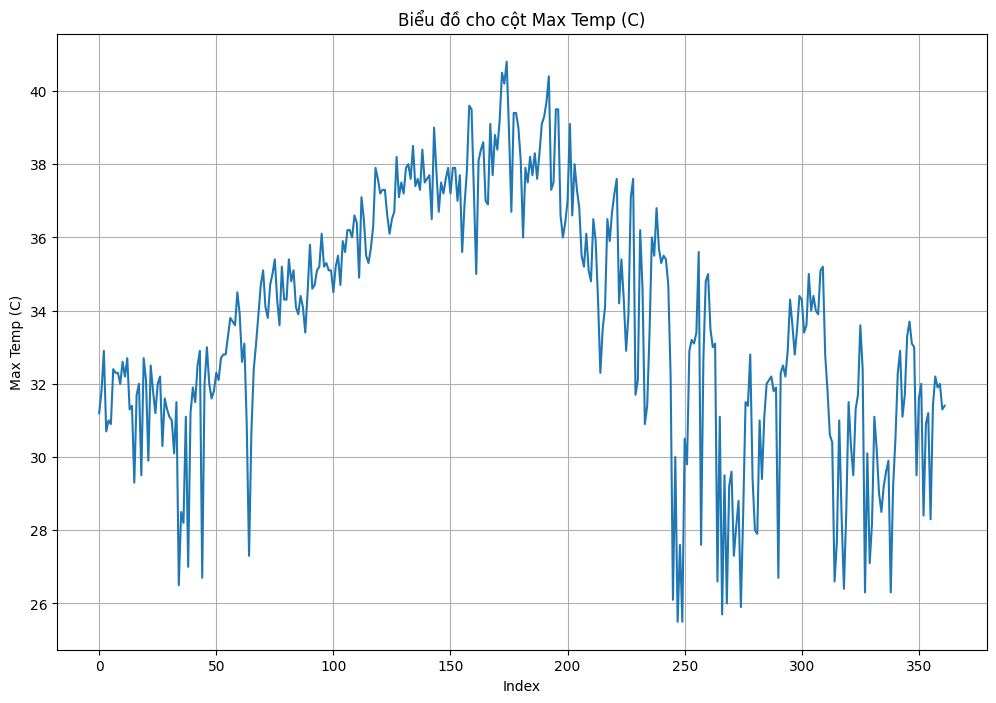

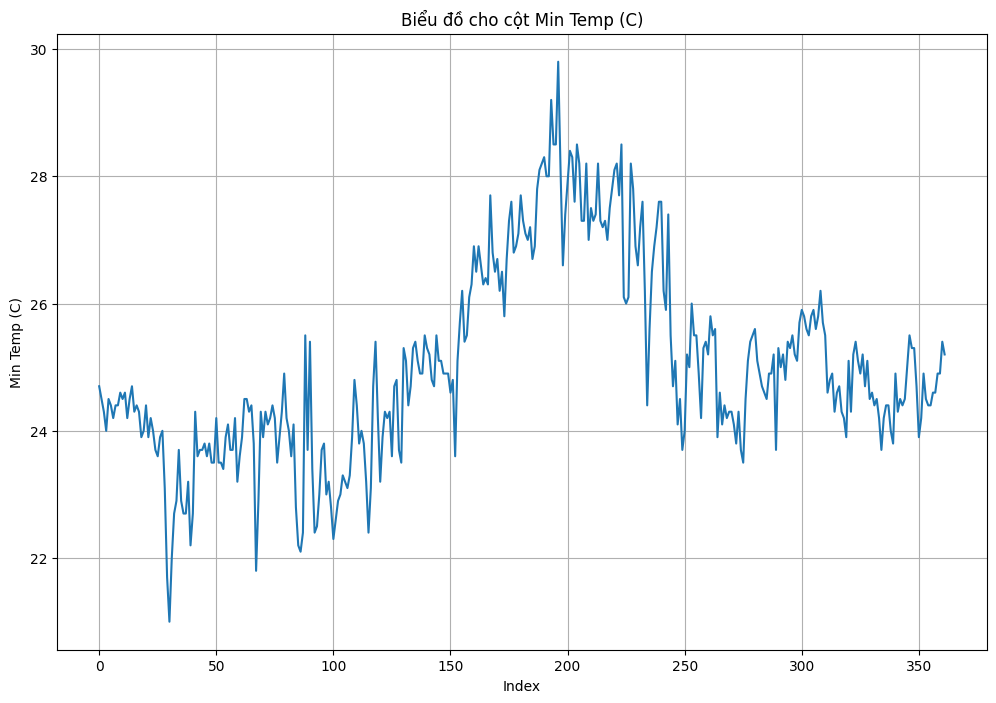

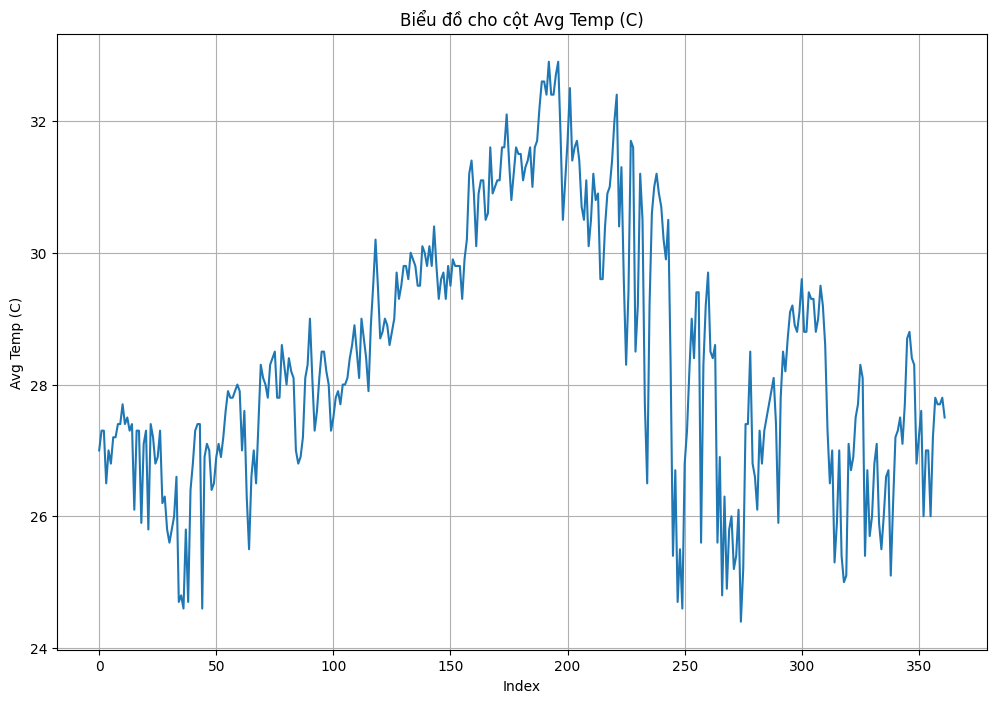

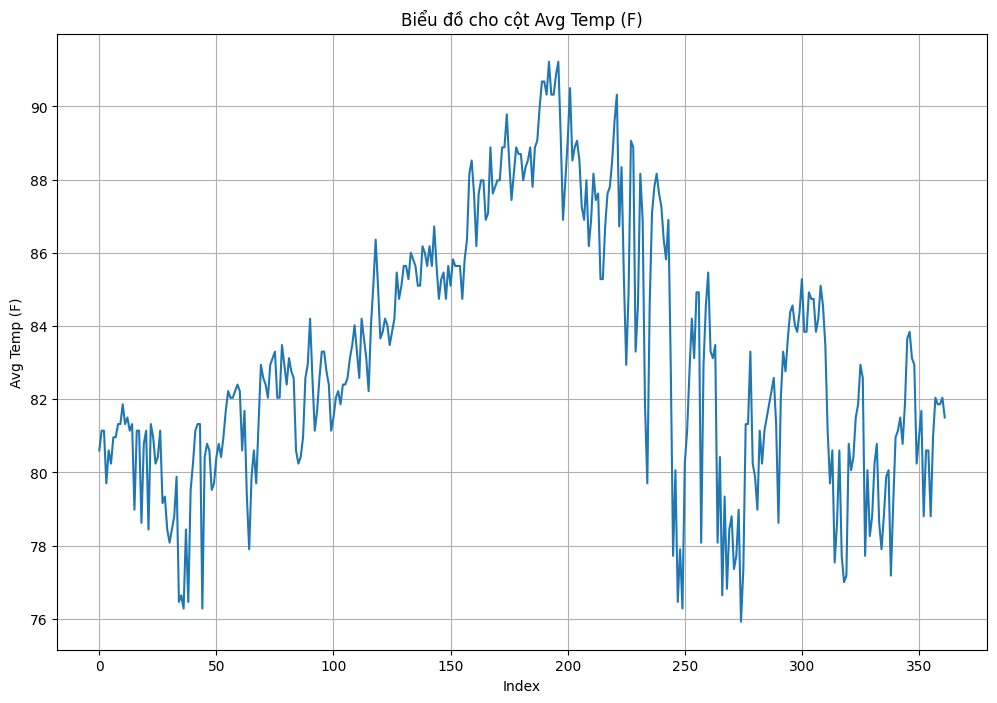

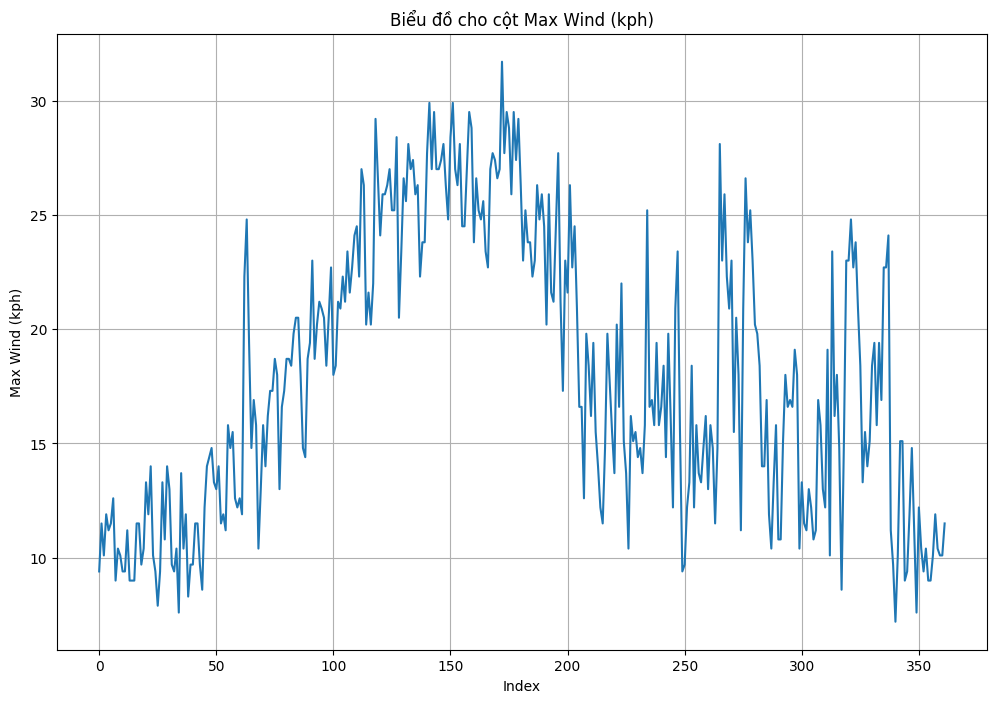

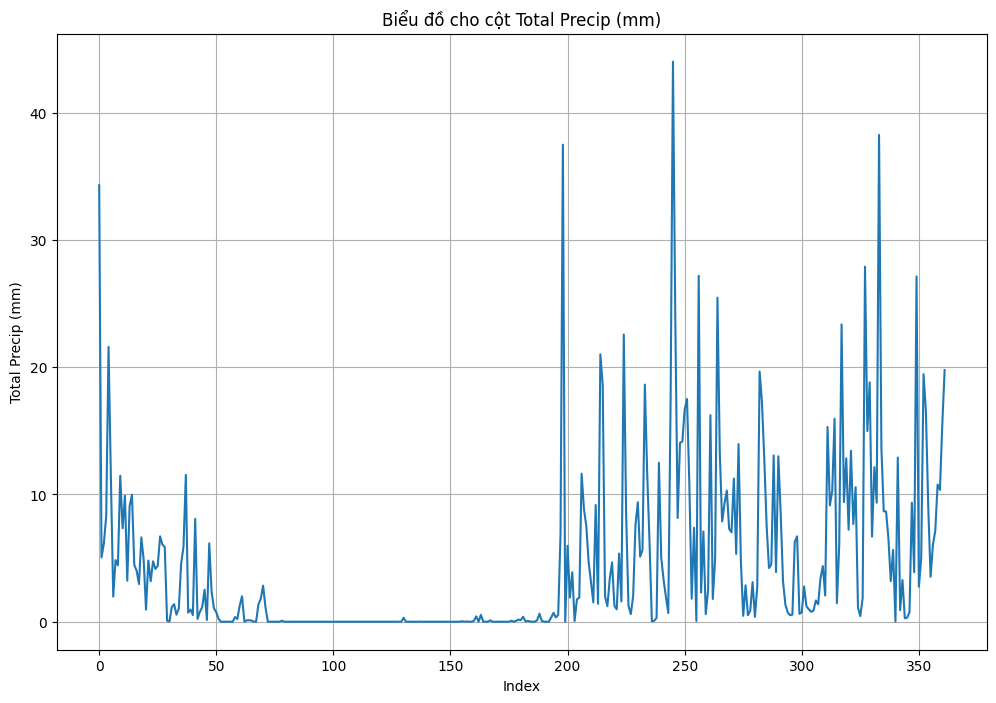

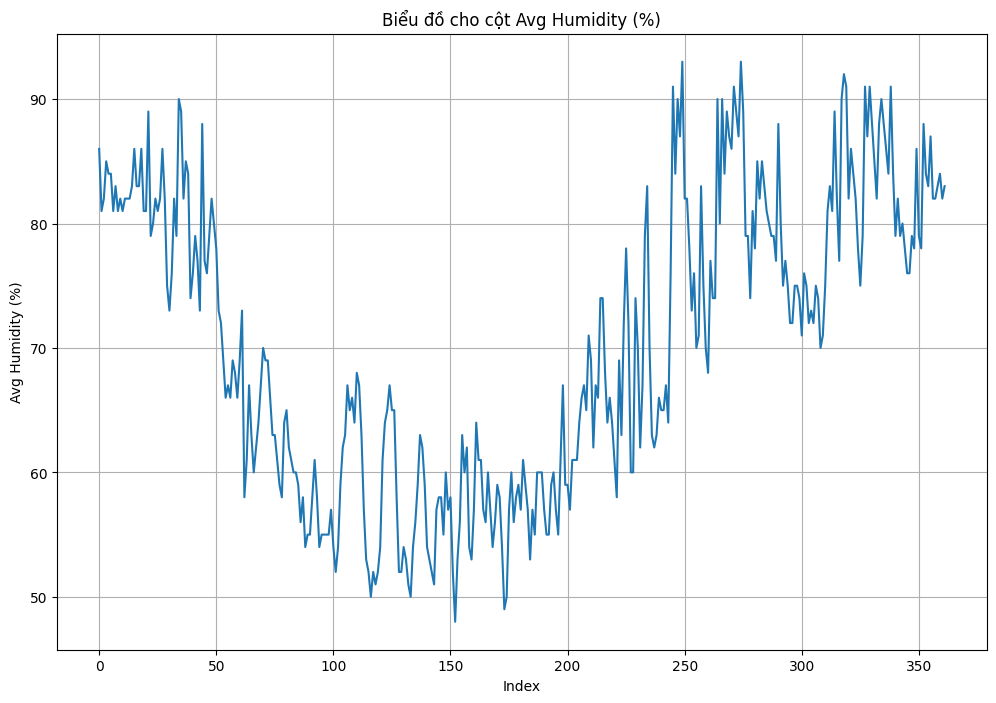

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Danh sách các cột để vẽ biểu đồ
columns_to_plot = ['Max Temp (C)', 'Min Temp (C)', 'Avg Temp (C)', 'Avg Temp (F)', 'Max Wind (kph)', 'Total Precip (mm)', 'Avg Humidity (%)']

# Lặp qua các cột và vẽ biểu đồ
for column in columns_to_plot:
    plt.figure(figsize=(12, 8))  # Chỉnh kích thước biểu đồ
    df[column].plot(kind='line')
    plt.title(f'Biểu đồ cho cột {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột datetime sang định dạng datetime và đặt làm index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Danh sách các cột để vẽ biểu đồ
columns_to_plot = ['Max Temp (C)', 'Min Temp (C)', 'Avg Temp (C)', 'Avg Temp (F)', 'Max Wind (kph)', 'Total Precip (mm)', 'Avg Humidity (%)']

# Lặp qua các cột và vẽ biểu đồ
for column in columns_to_plot:
    plt.figure(figsize=(15, 8))  # Chỉnh kích thước biểu đồ
    df[column].plot(kind='line')
    plt.title(f'Biểu đồ cho cột {column}')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


KeyError: 'date'